<a href="https://colab.research.google.com/github/kameshcodes/tensorflow-codes/blob/main/5_tensorflow_human_or_horse_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset
!unzip -q horses-or-humans-dataset.zip -d /content
!rm -rf /content/horse-or-human/horse-or-human
!rm -f /content/horses-or-humans-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset
License(s): other
100% 307M/307M [00:08<00:00, 45.2MB/s]
100% 307M/307M [00:08<00:00, 37.6MB/s]


## 1. Import Libraries

In [3]:
import os
import time
import random
import numpy as np
from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

#widgets
from ipywidgets import widgets
from IPython.display import display

In [4]:
TRAIN_DIR = 'horse-or-human/train'

print(f"files in current directory: {os.listdir()}")
print(f"\nSubdirectories in '{TRAIN_DIR}' dir: {os.listdir(TRAIN_DIR)}")

VAL_DIR = 'horse-or-human/validation'
print(f"\nSubdirectories in '{VAL_DIR}' dir: {os.listdir(VAL_DIR)}")

files in current directory: ['.config', 'horse-or-human', 'sample_data']

Subdirectories in 'horse-or-human/train' dir: ['humans', 'horses']

Subdirectories in 'horse-or-human/validation' dir: ['humans', 'horses']


In [5]:
train_horse_dir = os.path.join(TRAIN_DIR, 'horses')
train_human_dir = os.path.join(TRAIN_DIR, 'humans')

val_horse_dir = os.path.join(VAL_DIR, 'horses')
val_human_dir = os.path.join(VAL_DIR, 'humans')


train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

val_horse_names = os.listdir(val_horse_dir)
val_human_names = os.listdir(val_human_dir)

print(f"5 files in train/horses subdir: {train_horse_names[:5]}")
print(f"5 files in train/humans subdir: {train_human_names[:5]}")

print(f"\n5 files in val/horses subdir: {val_horse_names[:5]}")
print(f"5 files in val/humans subdir: {val_human_names[:5]}")

5 files in train/horses subdir: ['horse19-4.png', 'horse04-6.png', 'horse41-0.png', 'horse31-8.png', 'horse47-4.png']
5 files in train/humans subdir: ['human10-19.png', 'human04-13.png', 'human09-12.png', 'human07-17.png', 'human10-01.png']

5 files in val/horses subdir: ['horse3-026.png', 'horse1-335.png', 'horse4-072.png', 'horse4-188.png', 'horse2-218.png']
5 files in val/humans subdir: ['valhuman05-23.png', 'valhuman03-21.png', 'valhuman04-07.png', 'valhuman04-12.png', 'valhuman01-01.png']


In [6]:
print(f"total files in train/horses subdir: {len(train_horse_names)}")
print(f"total files in train/humans subdir: {len(train_human_names)}")
print(f'total files in val/horse subdir: {len(val_horse_names)}')
print(f'total files in val/human subdir: {len(val_human_names)}')

total files in train/horses subdir: 500
total files in train/humans subdir: 527
total files in val/horse subdir: 128
total files in val/human subdir: 128


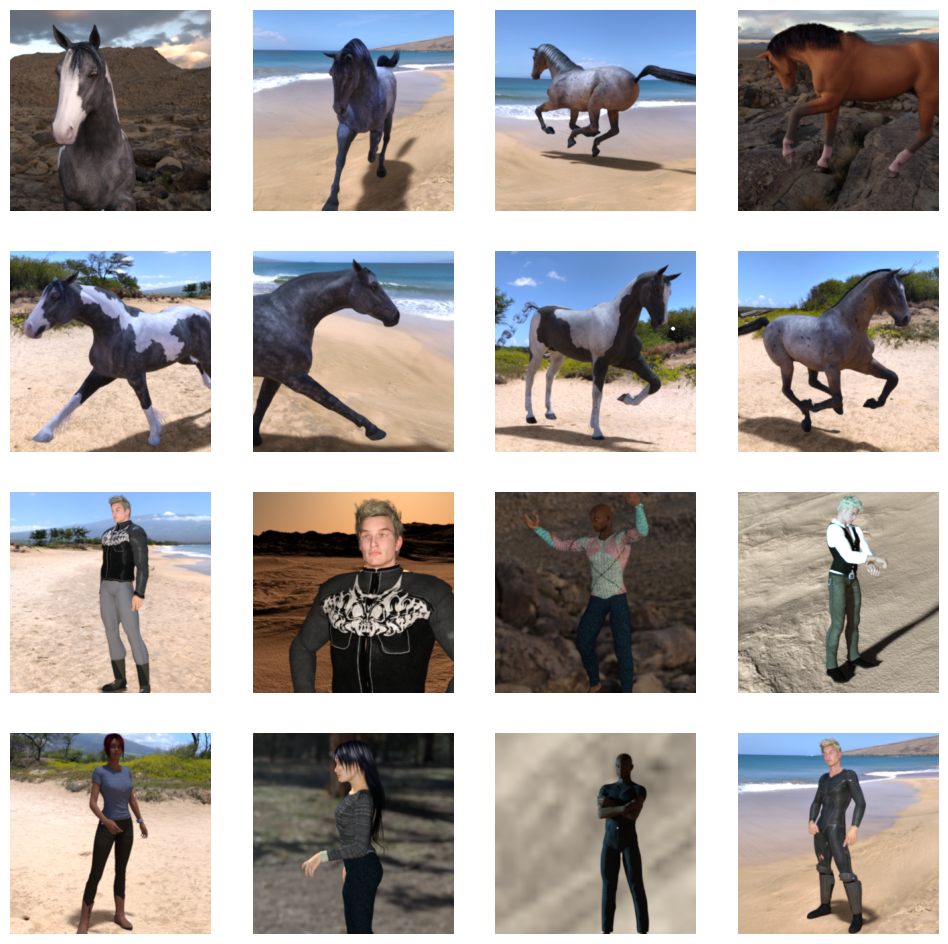

In [7]:
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in random.sample(train_horse_names, k=8)]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in random.sample(train_human_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## 2. CNN Model From Scratch

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300, 300, 3)),
    # First Layer
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second Layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth conv layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fifth
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flattening to feed to fully connected layer
    tf.keras.layers.Flatten(),
    # fCN
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              loss = 'binary_crossentropy', metrics = ['accuracy'])

## 3. Data Preprocessing pipeline

 - use the `image_from_dataset_directory` utility to read pictures in the source folders named ***horse-or-human***
 - Convert the images into tensors
 - combine with the labels and form a `tf.data.Dataset`

In [11]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size = (300, 300),
    batch_size = 32,
    label_mode = 'binary'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size = (300, 300),
    batch_size = 32,
    label_mode = 'binary'
    )

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [12]:
print(type(train_dataset))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [13]:
sample_batch = list(train_dataset.take(1))[0]

print(f'sample batch image datatype: {type(sample_batch)}')
print(f'number of elements: {len(sample_batch)}')

image_batch = sample_batch[0]
label_batch = sample_batch[1]

print(f'image batch shape: {image_batch.shape}')
print(f'label batch shape: {label_batch.shape}')

sample batch image datatype: <class 'tuple'>
number of elements: 2
image batch shape: (32, 300, 300, 3)
label batch shape: (32, 1)


In [14]:
print(image_batch[0].numpy())

[[[198. 187. 169.]
  [199. 187. 170.]
  [200. 188. 170.]
  ...
  [204. 191. 173.]
  [204. 191. 173.]
  [204. 191. 173.]]

 [[199. 187. 170.]
  [199. 188. 170.]
  [200. 188. 171.]
  ...
  [203. 190. 173.]
  [203. 190. 173.]
  [203. 190. 173.]]

 [[199. 188. 170.]
  [200. 188. 171.]
  [200. 189. 171.]
  ...
  [202. 190. 172.]
  [202. 190. 172.]
  [202. 190. 172.]]

 ...

 [[203. 192. 174.]
  [204. 192. 175.]
  [205. 193. 176.]
  ...
  [200. 188. 171.]
  [200. 189. 171.]
  [201. 190. 172.]]

 [[203. 192. 174.]
  [204. 193. 175.]
  [205. 193. 176.]
  ...
  [200. 189. 171.]
  [201. 189. 172.]
  [201. 190. 173.]]

 [[203. 192. 174.]
  [204. 193. 175.]
  [205. 193. 176.]
  ...
  [200. 189. 171.]
  [201. 190. 172.]
  [202. 191. 173.]]]


In [15]:
rescale_layer = tf.keras.layers.Rescaling(scale=1/255.0)

In [16]:
image_scaled = rescale_layer(image_batch)

print(image_scaled)

tf.Tensor(
[[[[0.77647066 0.73333335 0.6627451 ]
   [0.7803922  0.73333335 0.6666667 ]
   [0.7843138  0.7372549  0.6666667 ]
   ...
   [0.8000001  0.7490196  0.6784314 ]
   [0.8000001  0.7490196  0.6784314 ]
   [0.8000001  0.7490196  0.6784314 ]]

  [[0.7803922  0.73333335 0.6666667 ]
   [0.7803922  0.7372549  0.6666667 ]
   [0.7843138  0.7372549  0.67058825]
   ...
   [0.7960785  0.74509805 0.6784314 ]
   [0.7960785  0.74509805 0.6784314 ]
   [0.7960785  0.74509805 0.6784314 ]]

  [[0.7803922  0.7372549  0.6666667 ]
   [0.7843138  0.7372549  0.67058825]
   [0.7843138  0.7411765  0.67058825]
   ...
   [0.79215693 0.74509805 0.6745098 ]
   [0.79215693 0.74509805 0.6745098 ]
   [0.79215693 0.74509805 0.6745098 ]]

  ...

  [[0.7960785  0.75294125 0.68235296]
   [0.8000001  0.75294125 0.6862745 ]
   [0.80392164 0.7568628  0.6901961 ]
   ...
   [0.7843138  0.7372549  0.67058825]
   [0.7843138  0.7411765  0.67058825]
   [0.78823537 0.74509805 0.6745098 ]]

  [[0.7960785  0.75294125 0.682352

In [17]:
# train_dataset_scaled = train_dataset.map(lambda image, label: (rescale_layer(image), label))

def rescale_image(image, label):
  return rescale_layer(image), label

train_dataset_scaled = train_dataset.map(rescale_image)

#### Few more preprocessing to be added into pipeline

- cache
- shuffle
- prefetch

In [18]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (
    train_dataset_scaled
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)


validation_dataset_final = (
    validation_dataset
    .cache()
    .prefetch(PREFETCH_BUFFER_SIZE)
)

## 4. MODEL TRAINING

In [19]:
history = model.fit(
    train_dataset_final,
    epochs = 15,
    validation_data = validation_dataset_final
)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 149ms/step - accuracy: 0.5587 - loss: 0.7146 - val_accuracy: 0.6367 - val_loss: 71.1614
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8358 - loss: 0.4530 - val_accuracy: 0.8398 - val_loss: 206.0108
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9376 - loss: 0.1660 - val_accuracy: 0.8633 - val_loss: 128.5564
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9639 - loss: 0.1278 - val_accuracy: 0.8555 - val_loss: 148.1846
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9698 - loss: 0.0843 - val_accuracy: 0.9258 - val_loss: 63.5448
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9023 - loss: 0.4906 - val_accuracy: 0.8281 - val_loss: 328.7574
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9902 - loss: 0.0344 - val_accuracy: 0.8984 - val_loss: 165.5541
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9859 - loss: 0.0440 - val_accura

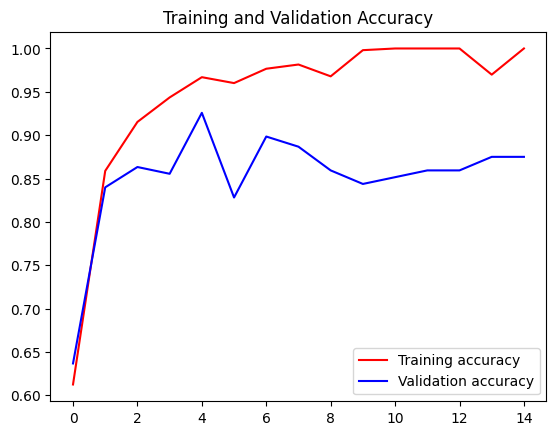

In [23]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title("Training and Validation Accuracy")
plt.legend(loc=0)
plt.show()

In [24]:
# Create the widget and take care of the display
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    """ A function for creating the prediction and printing the output."""
    start_time = time.time()
    image = tf.keras.utils.load_img(file, target_size=(300, 300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_layer(image)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0][0]
    end_time = time.time()
    end_time = time.time()
    time_taken = end_time - start_time

    with out:
        if prediction > 0.5:
            print(f"{filename} is a -> human (predicted in {time_taken:.2f} sec)")
        else:
            print(f"{filename} is a -> horse (predicted in {time_taken:.2f} sec)")


def on_upload_change(change):
    """ A function for getting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    uploaded_files = change.new
    for filename, file_info in uploaded_files.items():
        file_content = BytesIO(file_info['content'])
        file_predict(filename, file_content, out)


# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

# 5. Visualizing Intermediate Convolution Layers

<ipython-input-25-70989638cf56>:41: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-25-70989638cf56>:44: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


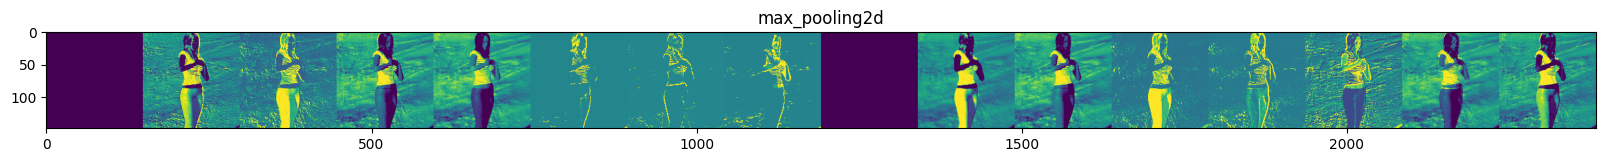

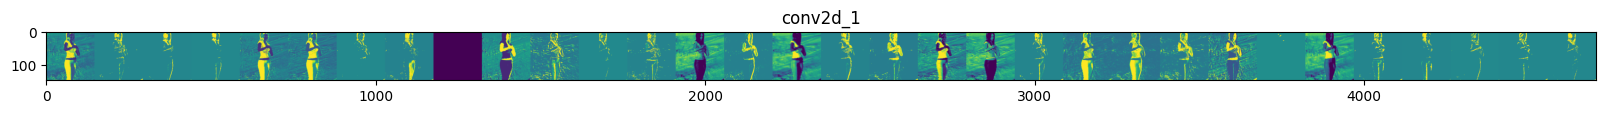

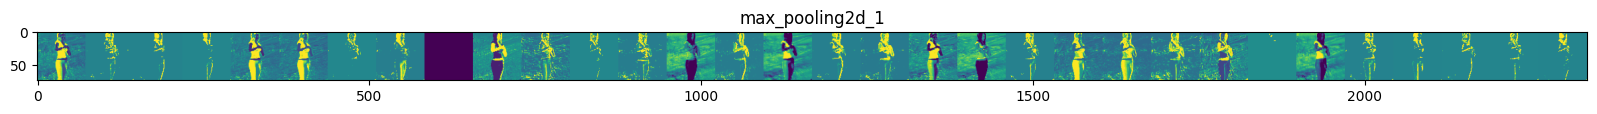

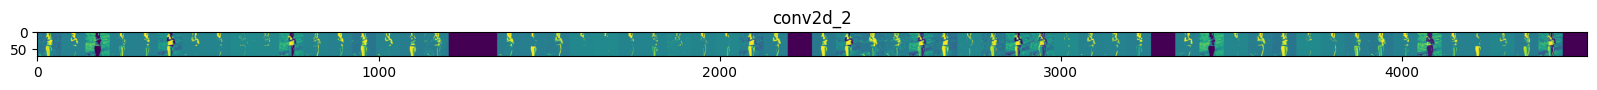

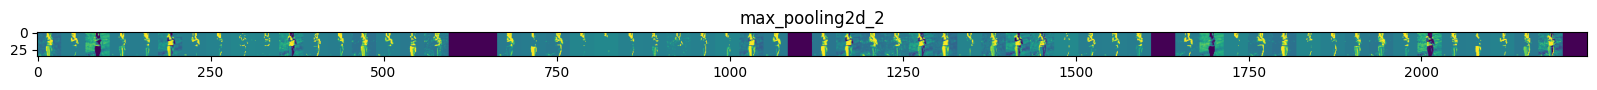

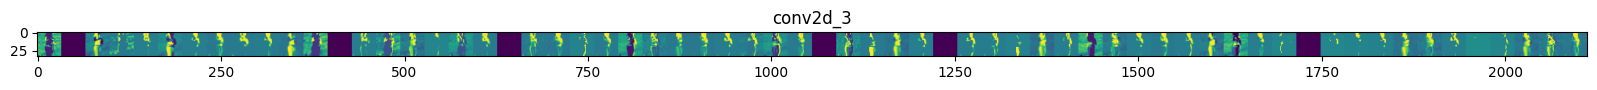

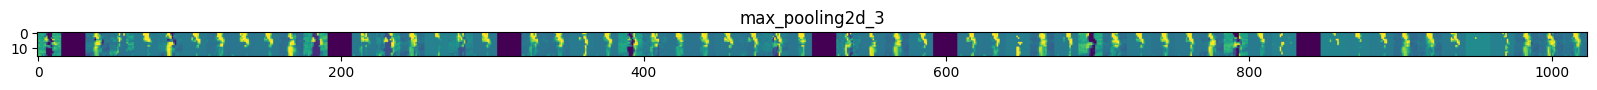

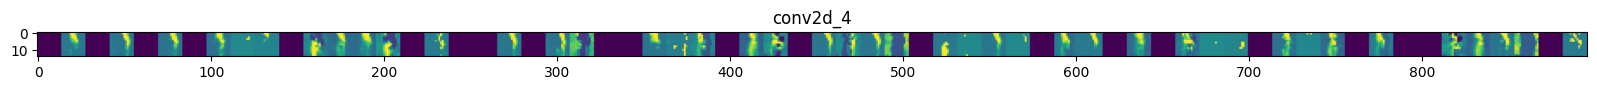

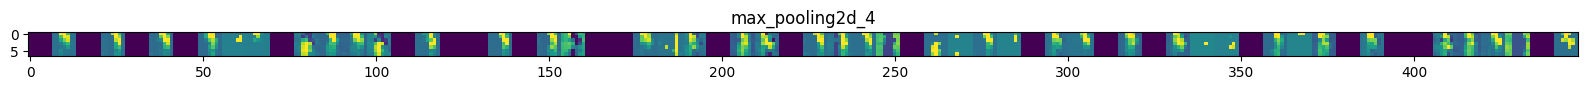

In [25]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.inputs, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = tf.keras.utils.load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = tf.keras.utils.img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x = rescale_layer(x)

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x, verbose=False)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

            # Tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x

        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')